## RECCION, MARIA VICTORIA B.
## S18

#### 1) How does this prove the Law of Large Numbers?

The Law of Large Numbers (LLN) states that the a posteriori probability converges to the a priori probability as the number of trials increases. In the Coinflips Sampling exercise, the number of trials is initially a large number; therefore the probability is already close to the a priori probability 50%. In the Sampling the Dataset and Analysis exercise, the larger the number of trials is when we flip the coin, the closer the a posteriori probability is to the a priori probability 50%.

#### 2) Does the Law of Large Numbers apply for all datasets?

LLN can be applied to all datasets: flipping a coin, drawing a card from a deck, among other small scale applications. It can also be applied to a much larger scale: finance, economic behavior, lottery, among other large scale applications.

#### 3) How else can we use the Law of Large Numbers?

Aside from coin flipping, LLN is significantly used in finance and to predict economic behavior. For example, there are two companies being observed: The total market of Company A is \$100 million, while the total market of Company B is \$6 million. Which of the companies is more likely to increase its total market value by 50% within the next few years?

If Company A increase its total market value by a half, they would need \$50 million increase. But Company B only needs \$3 million increase. Using LLN, it can be implied that Company B will more likely to expand by 50% than Company A. This works because if Company A was just as likely to expand by 50% as the other company, Company A could quickly have a higher market value than the entire economy.


## Law of Large Numbers
The law of large numbers states that the a posteriori probability converges to the a priori probability as the number of trials increases, and is one of the fundamental theorems of probability.

In [1]:
# imports

%matplotlib inline
from scipy.stats import norm
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np

#set font size of plots to 22
matplotlib.rcParams.update({"font.size":22})

## Coinflips Sampling

When flipping a fair coin, one can expect it to land on 'heads' with a probability of 50%. We want to show the Law of Large Numbers here by flipping the coin a large number of times and see how the probability moves towards 50%.

In [2]:
# TODO:
# Generate n random coinflips using python using the np.random.randint function with probability 50%
# Example: the list "data" should contain n integers that are either 0 or 1
# Find the a posteriori probability for the coinflips.

n = 1000000
data = np.random.randint(2, size=n)

# Mean can be used because the values are only 0 and 1. Let success be 1 and fail be 0.
np.mean(data)

0.49978499999999998

## Function Creation

To simplify the workflow and process of the experiments, we will create functions for random sampling from our dataset and finding the a posteriori probability from our sample.

In [4]:
# TODO:
# Create a function that randomly takes sampleSize items of the list data and places them into the list "samples"
# Use the np.random.choice function.

def getSample(sampleSize, data):
    samples = np.random.choice(data, size=sampleSize)
    return samples

# Create a function that finds the a posteriori probability for the coinflips samples.

def aPosteriori(sample):
    probability = np.mean(sample)
    return probability

## Sampling the Dataset and Analysis

Now that the data has been generated and the functions are created, the dataset only needs to be sampled and we can analyze our found information from the data.

In [5]:
# TODO:
# Prove the Law of Large Numbers.
# Show that the a posteriori probability converges to the a priori probability as the number of trials increases.



# YOUR CODE HERE
sizes = [1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, 5000000]
probabilities = []
for s in sizes:
    print("Number of trials: ", s, "\tProbability: ", aPosteriori(getSample(s, data)))


Number of trials:  1 	Probability:  0.0
Number of trials:  5 	Probability:  0.8
Number of trials:  10 	Probability:  0.4
Number of trials:  50 	Probability:  0.44
Number of trials:  100 	Probability:  0.5
Number of trials:  500 	Probability:  0.528
Number of trials:  1000 	Probability:  0.508
Number of trials:  5000 	Probability:  0.4976
Number of trials:  10000 	Probability:  0.5096
Number of trials:  50000 	Probability:  0.49954
Number of trials:  100000 	Probability:  0.49895
Number of trials:  500000 	Probability:  0.499618
Number of trials:  1000000 	Probability:  0.499268
Number of trials:  5000000 	Probability:  0.499874


## Sampling Means and Population Means

The law of large numbers also works for samples from a probability distribution. By applying the law of large numbers to sampling a population, one can see that the sample mean converges to the distribution mean as the sample size increases.

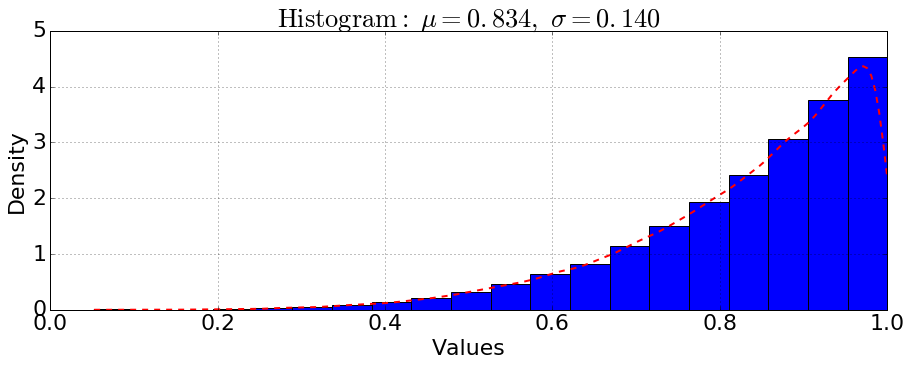

In [2]:
#generate n random values from a beta distribution
n = 100000
a = 5
b = 1
data = np.random.beta(a,b,n)

#visualize the histogram of the data
fig = plt.figure(figsize=(15,5))
num, bins, patches = plt.hist(data, 20,normed=True)

mean = np.mean(data);
stdev = np.std(data);

#plot the corresponding to the probability density function
density = gaussian_kde(data)
xs = np.linspace(np.min(data),np.max(data),200)
plt.plot(xs, density(xs), 'r--',linewidth=2)

#plot labels
plt.xlabel('Values')
plt.ylabel('Density')
plt.title(r'$\mathrm{Histogram:}\ \mu=%.3f,\ \sigma=%.3f$' %(mean, stdev))
plt.grid(True)


plt.show()

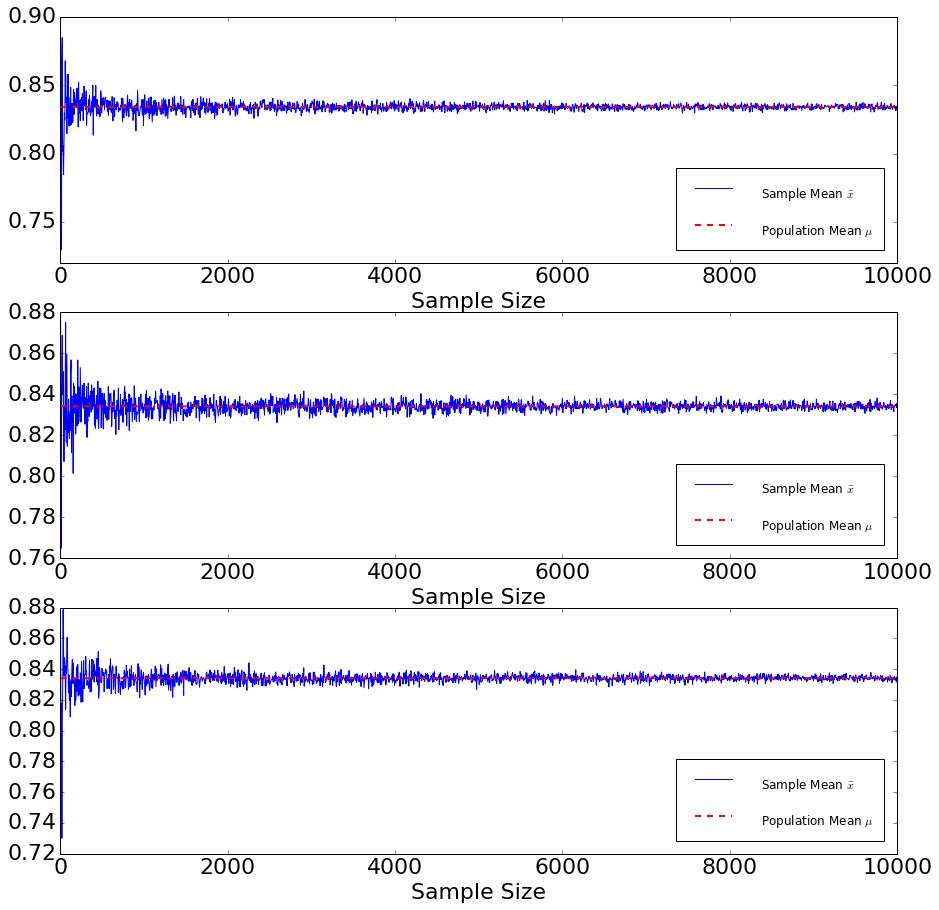

In [11]:
sizes = range(5,10000,5)
nSizes = len(sizes)
fig = plt.figure(figsize=(15,15))

for repeat in xrange(1,4):
    plt.subplot(3,1,repeat)
    sampleMeans = []
    for sample_size in sizes:
        sample = np.random.choice(data, sample_size, replace=False)
        sampleMeans.append(np.mean(sample))
    plt.plot(sizes,sampleMeans, label=r"Sample Mean $\bar{x}$")
    plt.plot(sizes,np.repeat([mean],nSizes), 'r--',linewidth=2, label=r"Population Mean $\mu$")
    plt.xlabel("Sample Size")
    legend = plt.legend(loc = "lower right")
    for label in legend.get_texts():
        label.set_fontsize(12)